# Programming for Data Science and Artificial Intelligence

## 9.3 Deep Learning -  Extending Deep Neural Network

### Readings

- [WEIDMAN] Ch4
- [CHARU] Ch2-3

In [1]:
#import from last time work so we can extend further
from neuralnet.first_version import *

#To make this simple, I have stored all our stuff 
#that we have develop so far in the folder 
#<code>/neuralnet/first_version.py</code>

In the last two classes, we focus on understanding deep neural net and I hope it's going fantastic.  Anyhow, what we have been discovering so far is the most basic form of it and most of the time, it is insufficient for most real-world problems.  

Today, we shall explore some well-understood techniques that make neural network training more likely to succeed.

Before doing that, let's review the intuition behind neural network:

In a high-level view, we can say that Neural Network is trying to most optimal parameters which is commonly defined as W that **minimizes the loss**, which can be described using the figure like this:

<img src="figures/4-1.png" style="width: 300px;"/>


Now, if we use non-linear activation function like sigmoid, **each W will have a non-linear relationship with the loss**.  If we plot one W against loss, while keeping everything constant, we get this oversimplistic graph:

<img src="figures/4-2.png" style="width: 300px;"/>

At the beginning, we will probably randomize a W value, and **we iterate to update our W by finding the gradients**.  How large should we move along the slope then?  We use **learning rate**.  Small learning rate means small step of update which can be slow but risk ending up in a **local minimia**, while large learning mean large step of update what will be faster but risk **hopping over"** the global minimum

<img src="figures/4-3.png" style="width: 300px;"/>

Now we can imagine there are many areas we can perhaps improve on:

1.  The **loss function**.  We used MSE as our loss function.  We chose this because it is convex (i.e., imagining a shape of U), meaning that when the loss is huge, the gradient is steeper (imagine the curve is very steep on the top of U but become less toward the bottom of U), allowing the model to quickly improve.  The good question we can ask here is **whether we can find a loss function that is steeper** and also is differentiable so gradient can be easily find, in order to accelerate the learning.

2. The **activation function**.  We used sigmoid as our activation function, but the gradient of sigmoid, *at best*, can have derivative of 0.25 which is quite small.   The good question we can ask here is **whether we can find a activation function that can provide larger range of derivative** and thus can accelerate the learning.

3. The **update rule**.  Now we only simply multiply the learning rate with the current gradient.  However, our batch X and y keeps changing.  It may be nice if we can update the params based on histories of gradients, not only on the current gradient.

4. The **learning rate**.  Currently, we put a static learning rate, but it does not make so much sense.  In fact, it can be safely assumed that our randomized weight is greatly far from the optimal weight and thus learning rate should be large.  However, as iterations run, learning rate should be slowly reduce so we do not keep hopping over and over again, not finding the minimum.

5. The **weight initialization** We currently simply randomize our Ws but the good question is whether we can improve this process a bit.

6. Last, the **overfitting**.  You may already realize that we so far is hesistant to add more layers.  Why?  Because more layers though may be more accurate but could potentially overfit.  Thus, we need to add some mechanisms to counter the act of adding more layers, in order to prevent overfitting.

Phew....they may look a lot but that's the point of the beauty of deep neural net.  Let's start with the loss function.

### Extension #1. Softmax Cross Entropy Function

So recall the question whether we can find **a loss function that is steeper**.

Indeed, if we consider a **classification problem**, **softmax cross entropy** as a loss function has a steeper gradients, exploiting the fact that we know the predicted results are probabilities that sum up to 1

The **Softmax Cross Entropy** function has two components: (1) softmax function, and (2) cross entropy function.

Let's first focus on the softmax function:


#### The Softmax Function

For example, let's have a classification problem with N classes, let's say 3 classes.  Then for sample 1, the predicted values can be written as:

Vector of probabilities for sample 1 = <code> [5, 3, 2] </code>

5, 3, 2 represent the regressed probabilities of each class.  For example, 5 represent the probability of sample 1 to belong to class 1, 3 for class 2, and 2 for class 3.   

To make it more clear, it is desirable to convert <code> [5, 3, 2] </code> to something like <code> [0.5, 0.3, 0.2] </code> so they sum up to 1 and are really probabilities. 

Indeed, this can be easily done by simply normalizing them like this:

$$ \text{Normalize}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{x_1}{x_1 + x_2 + x_3} \\ 
\frac{x_2}{x_1 + x_2 + x_3} \\
\frac{x_3}{x_1 + x_2 + x_3}
\end{bmatrix} $$

However, there turns out a way that both produces **steeper** gradients, and at the same time, **has elegant mathematical properties**.  This is called **softmax function** like this:

$$ \text{Softmax}(\begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix})  = \begin{bmatrix} \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} \\ 
\frac{e^{x_2}}{e^{x_1} + e^{x_2} + e^{x_3}} \\
\frac{e^{x_3}}{e^{x_1} + e^{x_2} + e^{x_3}}
\end{bmatrix} $$

The good properties include:
1. The softmax function makes the bigger value much bigger, forcing the neural network to be "less neutral".  This is doable since we are most interested in the class with biggest probability anyway.  If we apply <code>softmax([5, 3, 2])</code>, we get <code>[0.84, 0.11, 0.04]</code> which is different with the more neutral method of normalization which get <code>[0.5, 0.3, 0.2]</code>

2. The softmax function has a steeper gradients, comparing to simple normalization, since derivative of $e^x$ is $e^x$!

#### Cross Entropy Loss

Recall that loss function in classification problems take a vector of predicted probabilities 

$$ \begin{bmatrix} p_1 \\ . \\ . \\ p_n \end{bmatrix} $$

For N=3, we can have like this <code>[0.84, 0.11, 0.04]</code>

The loss function will then calculate the loss based on the differences between this vector of predicted probabilities and a vector of actual values that look like this:

$$ \begin{bmatrix} y_1 \\ . \\ . \\ y_n \end{bmatrix} $$

If sample 1 belongs to class 1, then this vector will look like this: <code>[1, 0, 0]</code>

The cross entropy loss function, for each index $i$ in these vectors, is 

$$ \text{CE}(p_i, y_i) = - y_i * \text{log}(p_i) - (1 - y_i) * \text{log}(1-p_i) $$

Why this loss function make sense?  Here is the breakdown situation when $y_i = 0$ and $y_i = 1$

$$
CE(p,y_i)=
\begin{cases}
-log(1-p_i) & \text{if }  y_i = 0\\
-log(p_i) & \text{if }  y_i = 1
\end{cases}
$$

If our $y_i = 0$, 

- When our $p_i$ is near 0 which means we are correct, the loss become 

$$-log(1) = 0$$

- otherwise, if our $p_i$ is near 1 which means we are incorrect, the loss becomes 

$$-log(0) = \infty$$

If our $y_i = 1$

- When our $p_i$ is near 0 which means we are incorrect, the loss become 

$$-log(0) = \infty$$

- otherwise, if our $p_i$ is near 1 which means we are correct, the loss becomes 

$$-log(1) = 0$$

If we were to plot the situation when $y_i = 0$, here is the plot:

Text(0, 0.5, 'Loss values')

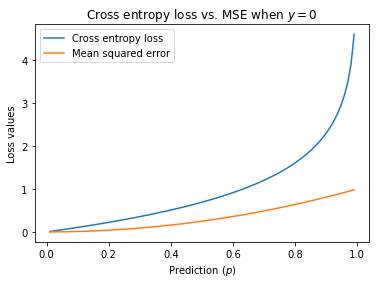

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.01, 0.99, 99)  #range of p
y1 = -1.0 * np.log(1 - x)  #the cross entropy
y2 = (x - 0) ** 2  #the MSE
plt.plot(x, y1);
plt.plot(x, y2);
plt.legend(['Cross entropy loss', 'Mean squared error'])

plt.title("Cross entropy loss vs. MSE when $y = 0$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Loss values")

You can clearly see that **cross entrophy** has a steeper gradient when the prediction is very far from the actual values

Similarly, we can plot when $y_i = 1$

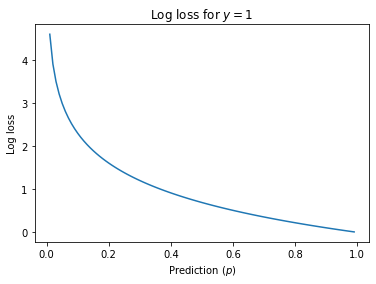

In [3]:
x = np.linspace(0.01, 0.99, 99)
y = -1.0 * np.log((x))

plt.plot(x, y);
plt.title("Log loss for $y = 1$")
plt.xlabel("Prediction ($p$)")
plt.ylabel("Log loss");

The real magic happens when we combine this loss with the softmax function like this:

$$ {SCE}_1 = - y_1 * log(\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) - (1 - y_1) * log(1-\frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}}) $$

This **softmax cross entropy** function first converts $x_1...x_n$ into probabilities, and then insert these probabilities into the cross entrophy function.

It turns out that the gradient can also be very easily calculated as follows:

$$\frac{\partial SCE_1}{\partial x_1} = \frac{e^{x_1}}{e^{x_1} + e^{x_2} + e^{x_3}} - y_1$$

That means that the total gradient is as follows:

$$ \text{softmax}(\begin{bmatrix} p_1 \\ p_2 \\ p_3 \end{bmatrix}) - \begin{bmatrix} y_1 \\ y_2 \\ y_3 \end{bmatrix} $$

Enough talk.  Let's code this up.

In [4]:
from numpy import ndarray

class SoftmaxCrossEntropy(Loss):
    def __init__(self, eps: float=1e-9):
        super().__init__()
        self.eps = eps

    def _output(self) -> float:
        
        # applying the softmax function to each row (observation)
        softmax_preds = self.softmax(self.prediction, axis=1)

        # clipping the softmax output to prevent numeric instability
        #numpy.clip(a, a_min, a_max, out=None, **kwargs)
        #To prevent extremely large loss values that could lead to numeric instability, 
        #we’ll clip the output of the softmax function to be no less than 10–7 and no greater than 10^7
        self.softmax_preds = np.clip(softmax_preds, self.eps, 1 - self.eps)

        # actual loss computation
        softmax_cross_entropy_loss = (
            -1.0 * self.target * np.log(self.softmax_preds) - \
                (1.0 - self.target) * np.log(1 - self.softmax_preds)
        )
        
        #return average loss
        return np.sum(softmax_cross_entropy_loss) / self.prediction.shape[0]

    def _input_grad(self) -> ndarray:
        #return average grad
        return (self.softmax_preds - self.target) / self.prediction.shape[0]

    def softmax(self, x, axis=None):
        #keepdims so that this number can be broadcasted and divided
        return np.exp(x) / np.sum(np.exp(x), axis=axis, keepdims=True)

### Extension #2. Activation Function

We use sigmoid in previous classes because we say that sigmoid was:
- non-linear and monotonic (one to one mapping)
- actually help overfitting by forcing all values to be between 0 and 1

Nevertheless, sigmoid produces **relatively flat gradients with maximum slopoe of only 0.25, i.e., any gradient that gets passed to the sigmoid function is at best, be divided by 4 when sent backward.  Worse still, when the input to the sigmoid is less than -2 or greater than 2, the gradient is almost zero**. See this graph for example:

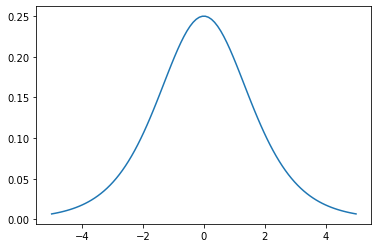

In [5]:
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1.0 * x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1.0 - sigmoid(x))

x = np.linspace(-5, 5, 100)
plt.plot(x, sigmoid_derivative(x))

What this means is that any parameters influencing these inputs will receive small gradients, and our network could elarn slowly as a result.  Worse yet, if we have multiple sigmoid functions in successive layers, it will further diminish the gradients.

So the question is, is there any other activation function that has bigger derivative.  Let's explore other activation function including **ReLu**, **Tanh**, and **Relu Leaky**.

#### ReLu (Rectified Linear Unit)

ReLu is simply defined to be 0 if x is less than 0, and x otherwise.  It's derivative is simply if x is more than 0, then the derivative is 1, otherwise is 0.

This is a valid activation function because it is monotonic and non-linear.  It produces much greater gradients.  However, the downside is that it draws a somewhat strange distinction between values less than or greater than 0. That can be fixed with **Leaky ReLu** which is simply using some alpha to make sure values smaller than zero does not completely gone.  Another one is **ReLu6** which is simply having the positive cap at 6 (it will not exceed 6), adding even more non-linearity into the network.

Nevertheless, if we are dealing with simple problems such as MNIST, then adding more sophiscated activation functions are NOT encouraged, since it adds more complexity and make the network harder to learn.

Luckily, there is a simple activation function that also produces strong gradients but is also simple: Tanh function

Text(0, 0.5, '$ReLU(x)$')

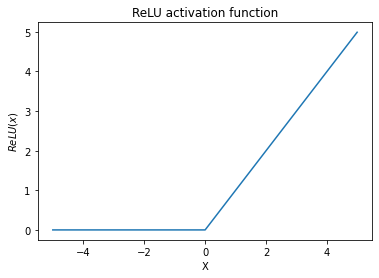

In [6]:
def relu(x):
    return np.array([el if el > 0 else 0 for el in x])

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

x = np.arange(-5, 5, 0.01)
plt.plot(x, relu(x))
# plt.plot(x, relu_derivative(x))
plt.title("ReLU activation function")
plt.xlabel("X")
plt.ylabel("$ReLU(x)$")

#### Tanh

The Tanh function is shaped similarly to the sigmoid function but maps inputs to values between -1 and 1.  It produces strong gradient with maximum of 1.  It also has a simple derivative of $$1 - tanh(x)^2$$

Given that tanh has strong gradient of 1, it is commonly a natural replacement of sigmoid since tanh is better than sigmoid in the gradient, but share the same downside of sigmoid, i.e., having gradient of 0 after x is around the left/right side of the curve.

Tanh is also considered a balance between sigmoid and ReLu.  Sigmoid is very conservative, while Relu is very progressive - always producing gradient of 1 when x is greater than 0.   In common problem, Tahn is sufficient to improve the performance over sigmoid.  In more sophiscated problems with many non-linearity, we may use ReLu.

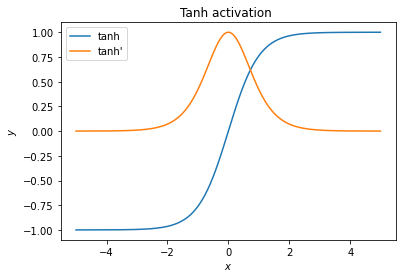

In [7]:
x = np.arange(-5, 5, 0.01)
plt.plot(x, np.tanh(x), label="tanh")
plt.plot(x, 1 - (np.tanh(x) **2), label="tanh'")
plt.title("Tanh activation ")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()

Finally, we can write the Tanh function as a class like this:

In [8]:
class Tanh(Operation):
    def __init__(self):
        super().__init__()

    def _output(self) -> ndarray:
        return np.tanh(self.input_)

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        return output_grad * (1 - self.output * self.output)

### Experiments

Before we dive into other possible extensions.  Let's try out our techniques using MNIST dataset, which consists of black and white images of handwritten digits that are 28 x 28 pixels, with the value of each pixel range from 0 to 255.

Here we gonna have 60,000 images on training and 10,000 images for testing

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(int)

X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]

X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

#### Data Preprocessing

1. Always help to standardize our data   The reason we do this is because in the process of training our network, we're going to be multiplying (weights) and adding to (biases) these initial inputs in order to cause activations that we then backpropogate with the gradients to train the model.  We'd like in this process for each feature to have a similar range so that our gradients don't go out of control (and that we only need one global learning rate multiplier).

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2. We need to convert our y which current is a single digit showing the class (e.g., 9), we need to convert to a vector of probabilities like this <code>[0, 0, 0, 0, 0, 0, 0, 0, 1]</code>  which indicates that this sample is of class 9.  This process is also commonly known as *one hot encoding*  We can use <code>sklearn.preprocessing</code> to make our life easier:

In [11]:
from sklearn import preprocessing
onehot = preprocessing.OneHotEncoder()

#sklearn expects a 2D array thus we have to reshape to (-1, 1)
y_train_encode = onehot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_encode = onehot.fit_transform(y_test.reshape(-1, 1)).toarray()

print(y_train_encode.shape, y_test_encode.shape)

(60000, 10) (10000, 10)


In [12]:
#define a simple accuracy function

from sklearn.metrics import accuracy_score

def calc_accuracy(model, X_test, y_test):    
    #getting the accuracy score with testing data
    preds = model.forward(X_test)
    preds = np.argmax(preds, axis=1)
    print("Accuracy: ", accuracy_score(y_test, preds))

1. **Sigmoid activation function**

We gonna first use Tanh activation on the first Dense layer.  Then on the second layer (i.e., last layer), since the output has 10 numbers with number in range of [0, 1], thus the last layer has 10 neurons with Sigmoid activation to squeeze the result into that range of [0, 1]

**A key question is how many neurons should be our hidden layer which is the Tanh layer.**. This is a entire field of its own and there are really tough to determine the right number.  However, the one consensus is that **number of neurons should be between the number of neurons in the input layer (e.g., 784) and the number of neurons in the output layer (e.g., 10)**

Anyhow, this leave us still doubtful what number to choose between 10 and 784.   Another useful technique is to take the **number of sample / (alpha * number of neurons in both input and output layers)**.  This can often prevent overfitting.  For example, let alpha be 1 (typically around 2 - 10), it can be calculated as:

$$ 60,000 / (1 * 784 + 10) = 75.6 $$

Thus we can use around 76 neurons.  Another technique is to use the mean.  Since we are talking about images, we can take the **geometric mean of 784 and 10** which can be calculated as:

$$ \sqrt{784 * 10} = 88.54 $$

Thus we can use around 89 neurons.

Anyhow, talking about this probably require all of us to read tons of research papers!  Here is some discussion you can read (https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw).  The general idea is that the more neurons you have, it usually helps in model more complex relationships, but it also come with a downside that it takes much more time to learn.

Also note that all what we discuss only apply to feed-forward neural network...

Let's stick with 89 neurons for now.

In [13]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Sigmoid())],
            loss = MeanSquaredError(), 
seed=20200720)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Validation loss after 10 epochs is 0.300
Validation loss after 20 epochs is 0.245
Validation loss after 30 epochs is 0.225
Validation loss after 40 epochs is 0.216
Validation loss after 50 epochs is 0.210
Accuracy:  0.8758


2. **Softmax Cross Entropy Loss**

Let's prove our claim that softmax cross entropy can help our model learn faster.  

Similarly, we gonna use Tanh activation on the beginning.  Since we are now feeding our results to the SoftmaxCrossEntropy which has a softmax function to make things into probabilities, we simply use a Linear activation function in the last layer.

In [14]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGD(0.1))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Validation loss after 10 epochs is 0.683
Validation loss after 20 epochs is 0.645
Validation loss after 30 epochs is 0.636
Validation loss after 40 epochs is 0.635
Validation loss after 50 epochs is 0.633
Accuracy:  0.8924


Yay, we see a 2\% increase.  Although this is minimal, they stack up with other improvements!

### Extension #3: Momentum

So far, we’ve been using only one update rule for our weights at each time step. Simply take the derivative of the loss with respect to the weights and move the weights in the resulting correct direction.

Here we gonna introduce a new way based on using the history of gradients called **momentum**

Basing our parameter updates on momentum means that the parameter update at each time step will be a weighted average of the parameter updates at past time steps, with the weights decayed exponentially. There will thus be a second parameter we have to choose, the momentum parameter, which will determine the degree of this decay; the higher it is, the more the weight update at each time step will be based on the parameter’s accumulated momentum as opposed to its current velocity

Mathematically, if our momentum parameter is $\mu$, and the gradient at each time step is $\nabla_t$, our weight update is 

$$\text{update} = \nabla_t + \mu * \nabla_{t-1} + \mu^2 * \nabla_{t-2} + \ldots$$

If our momentum parameter was $0.9$, for example, we would multiply the gradient from one time step ago by $0.9$, the one from two time steps ago by $0.9^2 = 0.81$, the one from three time steps ago by $0.9^3 = 0.729$, and so on, and then finally add all of these to the gradient from the current time step to get the overall weight update for the current time step.

#### Why momentum?

The problem of the old way is that it is possible that it stucks at the local minima, just like the picture below.

<img src = "figures/momentum.png" width="300">

To avoid this situation, we use a momentum term in the objective function, which is a value between 0 and 1 that increases the size of the steps taken towards the minimum by trying to jump from a local minima. If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step. A small value of momentum cannot reliably avoid local minima, and can also slow down the training of the system. 

Momentum also helps in smoothing out the variations, if the gradient keeps changing direction, just like in this graph

<img src = "figures/momentum2.png" width="500">

**A right value of momentum can be either learned by hit and trial or through cross-validation.**

To implement this, a simple way is just to keep track of what you have added so far, and simply add the current gradient on top of it, like this:

1. $\nabla_1$
2. $\nabla_2 + \mu * \nabla_1$
2. $\nabla_3 + \mu * (\nabla_2 + \mu * \nabla_1)$

We can call the right side after the first time, called velocity which is the history of momentum * gradients.  In every iteration, we simply multiply the velocity by momentum again, and add up the current grad.  

In [15]:
class SGDMomentum(Optimizer):
    def __init__(self,
                 lr: float = 0.01,
                 momentum: float = 0.9):
        super().__init__(lr)
        self.momentum = momentum
        self.first = True

    def step(self):
        if self.first:
            self.velocities = [np.zeros_like(param)
                               for param in self.net.params()]
            self.first = False

        for (param, param_grad, velocity) in zip(self.net.params(),
                                                 self.net.param_grads(),
                                                 self.velocities):
            self._update_rule(param=param,
                              grad=param_grad,
                              velocity=velocity)

    def _update_rule(self, **kwargs):            
            # Update velocity
            kwargs['velocity'] *= self.momentum
            kwargs['velocity'] += self.lr * kwargs['grad']

            # Use this to update parameters
            kwargs['param'] -= kwargs['velocity']

Let's try this replacing SGD with SGDMomentum

In [16]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGDMomentum(lr=0.1, momentum=0.9))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Validation loss after 10 epochs is 0.549
Loss increased after epoch 20, final loss was 0.549, using the model from epoch 10
Accuracy:  0.9154


Yay, it improves another 2\%!  These improvements slowly stack up.

### Extension #4: Learning rate decay

In previous classes, we fix the learning rate.  However, learning rate decay is the idea that while we want to take big steps toward the beginning of training, we want to smoothly declines so it does not skip over the minimum.

There are different types.  The simplest is **linear decay**.  At time step $t$ with $N$ iterations (epochs), if the learning rate we want to start with is 
$\alpha_{start}$, and our final learning rate is $\alpha_{end}$, then our learning rate at each time step is:

$$\alpha_{t} = \alpha_{start} - (\alpha_{start} - \alpha_{end}) * \frac{t}{N}$$

Another simple method is **exponential decay** where the formula is:

$$\alpha_{t} = \alpha_{start} * ((\frac{\alpha_{end}}{\alpha_{start}})^\frac{1}{N})^t$$

Implementing this requires us to update our <code>Optimizer</code> function as the following:

In [17]:
class Optimizer(object):
    def __init__(self,
                 lr: float = 0.01,
                 final_lr: float = 0,
                 decay_type: str = 'exponential'):
        self.lr = lr
        self.final_lr = final_lr  #<----added
        self.decay_type = decay_type #<----added

    def _setup_decay(self):  #<----added

        if not self.decay_type:
            return
        elif self.decay_type == 'exponential':
            self.decay_per_epoch = np.power(self.final_lr / self.lr,
                                       1.0 / (self.max_epochs - 1))
        elif self.decay_type == 'linear':
            self.decay_per_epoch = (self.lr - self.final_lr) / (self.max_epochs - 1)

    def _decay_lr(self): #<----added

        if not self.decay_type:
            return

        if self.decay_type == 'exponential':
            self.lr *= self.decay_per_epoch

        elif self.decay_type == 'linear':
            self.lr -= self.decay_per_epoch

    def step(self, epoch: int = 0):  #<----added epoch info

        for (param, param_grad) in zip(self.net.params(),
                                       self.net.param_grads()):
            self._update_rule(param=param,
                              grad=param_grad)

    def _update_rule(self, **kwargs):
        raise NotImplementedError()

Our <code>SGDMomentum</code> class is also updated:

In [18]:
class SGDMomentum(Optimizer):
    def __init__(self,
                 lr: float = 0.01,
                 final_lr: float = 0,   #<----added
                 decay_type: str = None,   #<------added
                 momentum: float = 0.9):
        super().__init__(lr, final_lr, decay_type)   #<---changed
        self.momentum = momentum
        self.first = True

    def step(self):
        if self.first:
            self.velocities = [np.zeros_like(param)
                               for param in self.net.params()]
            self.first = False

        for (param, param_grad, velocity) in zip(self.net.params(),
                                                 self.net.param_grads(),
                                                 self.velocities):
            self._update_rule(param=param,
                              grad=param_grad,
                              velocity=velocity)

    def _update_rule(self, **kwargs):

            # Update velocity
            kwargs['velocity'] *= self.momentum
            kwargs['velocity'] += self.lr * kwargs['grad']

            # Use this to update parameters
            kwargs['param'] -= kwargs['velocity']

We also need to update our <code>Trainer</code> to call this decay function like this:

In [19]:
from copy import deepcopy
from typing import Tuple

class Trainer(object):
    #NeuralNetwork and Optimizer as attributes
    def __init__(self,
                 net: NeuralNetwork,
                 optim: Optimizer):
        #Requires a neural network and an optimizer in order for 
        #training to occur. 
        self.net = net
        self.optim = optim
        self.best_loss = 1e9  #use for comparing the least amount of loss
        
        #Assign the neural network as an instance variable to 
        #the optimizer when the code runs
        setattr(self.optim, 'net', self.net)
    

    # helper function for shuffling
    def permute_data(self, X, y):
        perm = np.random.permutation(X.shape[0])
        return X[perm], y[perm]

    # helper function for generating batches
    def generate_batches(self,
                         X: ndarray,
                         y: ndarray,
                         size: int = 32) -> Tuple[ndarray]:
        #X and y should have same number of rows
        assert X.shape[0] == y.shape[0]

        N = X.shape[0]

        for i in range(0, N, size):
            X_batch, y_batch = X[i:i+size], y[i:i+size]
            #return a generator that can be loop
            yield X_batch, y_batch

            
    def fit(self, X_train: ndarray, y_train: ndarray,
            X_test: ndarray, y_test: ndarray,
            epochs: int=100,
            eval_every: int=10,
            batch_size: int=32,
            seed: int = 20200720,
            restart: bool = True):
        
        
        setattr(self.optim, 'max_epochs', epochs)  #<----added
        self.optim._setup_decay() #<----added

        np.random.seed(seed)
        
        #for resetting
        if restart:
            for layer in self.net.layers:
                layer.first = True

            self.best_loss = 1e9
        
        #Fits the neural network on the training data for a certain 
        #number of epochs.
        for e in range(epochs):
            
            if (e+1) % eval_every == 0:
                
                # for early stopping
                # deepcopy is a hardcopy function that make sure it construct a new object (copy() is a shallow copy)
                last_model = deepcopy(self.net)

            X_train, y_train = self.permute_data(X_train, y_train)

            batch_generator = self.generate_batches(X_train, y_train,
                                                    batch_size)

            for (X_batch, y_batch) in batch_generator:

                self.net.train_batch(X_batch, y_batch)

                self.optim.step()
            
            #Every "eval_every" epochs, it evaluated the neural network 
            #on the testing data.
            if (e+1) % eval_every == 0:

                test_preds = self.net.forward(X_test)
                loss = self.net.loss.forward(test_preds, y_test)

                if loss < self.best_loss:
                    print(f"Validation loss after {e+1} epochs is {loss:.3f}")
                    self.best_loss = loss
                #if the validation loss is not lower, it stop and perform early stopping
                else:
                    print(f"""Loss increased after epoch {e+1}, final loss was {self.best_loss:.3f}, using the model from epoch {e+1-eval_every}""")
                    self.net = last_model
                    # ensure self.optim is still updating self.net
                    setattr(self.optim, 'net', self.net)
                    break
            
            #call this at the end of each epoch
            if self.optim.final_lr:  #<------added
                self.optim._decay_lr()   #<-----added

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh()),
            Dense(neurons=10, 
                  activation=Linear())],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9,
                                    final_lr=0.05, decay_type='exponential'))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Validation loss after 10 epochs is 0.505


Yay, another 1.5\% increase!!!  Hopefully we can reach 0.95...

### Extension #5: Weight Initialization

As we mentioned in the section on activation functions, several activation functions, such as sigmoid and Tanh, have their steepest gradients when their inputs are 0, with the functions quickly flattening out as the inputs move away from 0. This can potentially limit the effectiveness of these functions, because if many of the inputs have values far from 0, the weights attached to those inputs will receive very small gradients on the backward pass.

This turns out to be a major problem in the neural networks we are now dealing with. Consider the hidden layer in the MNIST network we’ve been looking at. This layer will receive 784 inputs and then multiply them by a weight matrix, ending up with some number n of neurons (and then optionally add a bias to each neuron). 

This figure shows the distribution of these n values in the hidden layer of our neural network (with 784 inputs) before and after feeding them through the Tanh activation function.

<img src="figures/distribution.png" width="300">

After being fed through the activation function, most of the activations are either –1 or 1!

The reason is because we initialized each weight to have variance 1 (Recall that we use <code>random.rand(num_feature, num_neurons)</code> which basically create a uniform distribution of <code>[0, 1)</code> with variance 1.  Also for bias, we use <code>random.rand(1, num_neurons)</code>):

$$ \text{Var}(w_{i,j}) = 1 $$

Thus, if we have 785 features (784 + 1 for b), each having one variance, this gives us a standard deviation of:

$$ \sqrt{785} = 28.02 $$

This is pretty huge .  So what should be the right distribution of weights?  Well, it certainly should depend on the number of neurons in the in and out layer.  The weight matrix should have a roughly normal distribution across all neurons.  But now we have in- and out- layer, which should we use as basis?  Let's think each of them first.  

For in-layer, the standard deviation of each weight on the forward pass should be

$$ \frac{1}{n_{in} } $$ 

At the same time, for the next layer, 

$$ \frac{1}{n_{out} } $$ 

As a compromise between these, what is most often called **Glorot initialization (also known as Xavier)**, the idea is to initialize each weight with a small Gaussian value with mean = 0.0 and variance based on the fan-in and fan-out of the weight like this:

$$ \frac{2}{n_{in} + n_{out}} $$ 

where $n_{in}$ is the number of input neurons, and $n_{out}$ is the number of output neurons.

By doing this, we make sure the distribution of the weights in the beginning is uniformed across all neurons in the beginning.

To do this is simple, we add a <code>weight_init</code> argument to each layer, and we add the following to our <code>_setup_layer</code> function

In [ ]:
class Dense(Layer):
    def __init__(self, neurons: int,
                 activation: Operation = Sigmoid(),
                 weight_init: str = "glorot"): #<---added
        #define the desired non-linear function as activation
        super().__init__(neurons)
        self.activation = activation
        self.weight_init = weight_init #<----added

    def _setup_layer(self, input_: ndarray):
        #in case you want reproducible results
        if self.seed:
            np.random.seed(self.seed)

        #---------->added section
        num_in = input_.shape[1]

        if self.weight_init == "glorot":
            scale = 2/(num_in + self.neurons)
        else:
            scale = 1.0   
        #--------------------------------------
            
        #---------->revised section
        self.params = []
        
        # weights
        self.params.append(np.random.normal(loc=0,
                                            scale=scale,
                                            size=(num_in, self.neurons)))

        # bias
        self.params.append(np.random.normal(loc=0,
                                            scale=scale,
                                            size=(1, self.neurons)))
        #--------------------------------------

        self.operations = [WeightMultiply(self.params[0]),
                           BiasAdd(self.params[1]),
                           self.activation]

We can then try our models with this function:

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9,
                                    final_lr=0.05, decay_type='exponential'))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Yay, another 1\% increase!  

### Extension #6: Dropout

Recall the discussion in the beginning of the class that adding more layers are prone to overfitting, and thus we are quite hesitant to add more layers than we need.  Indeed, with one hidden layer, we are doing good job so far.

The good question to ask is what if we want to add more layers in the future, for example, for more complex data?

The answer is yes, with **Dropout**.  **Dropout** is a mechanism to make our neural network less likely to overfit

**Dropout** is actually a simple idea of randomly choosing some proportion $p$ of the neurons in a layer and setting them equal to 0 during each forward pass of training. By randomly setting some neurons to null in each iteration, the other neurons become more generalized in learning.

Though dropout can help our network avoid overfitting during training, we still want to give our network its *best shot* of making correct predictions when it comes time to predict. So, the Dropout operation will have **two modes**: a **training** mode in which dropout is applied, and an **inference** mode, in which it is not. 

To make sure the distribution of the values during inference time is close to that during training time, we should multiply values by $P_{keep}$.  For example, say we have a vector of $x = {1, 2, 3, 4, 5}$.  Let's set $p=0.8$ which means 20\% of data will be turn to 0.  In training, $x_{train} = {1, 0, 3, 4, 5}$ ; do not confuse why I turn off 2 and not others, I just turn 20\% off randomly.  In inference, we turn off dropout, but to make sure the distribution remains similar, we multiply the values by 0.8, which becomes $x_{inference} = {0.8, 1.6, 2.4, 3.2, 4.0}$

We can implement **Dropout** as an <code>Operation</code>, that we can attach onto the end of each layer like this:

In [ ]:
class Dropout(Operation):

    def __init__(self,
                 keep_prob: float = 0.8):
        super().__init__()
        self.keep_prob = keep_prob

    def _output(self, inference: bool) -> ndarray:
        if inference:
            return self.input_ * self.keep_prob  #multiply input by probability
        else:
            #binomial will give us list of 0 and 1s with 1s of probability equal to keep_prob
            self.mask = np.random.binomial(1, self.keep_prob,
                                           size=self.input_.shape)  
            return self.input_ * self.mask

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        #since gradient of 0 is nothing, thus the input_grad is simply whatever output_grad multiply with self.mask
        return output_grad * self.mask

You may have noticed that we included an inference flag in the _output method that affects whether dropout is applied or not. For this flag to be called properly, we actually have to add it in several other places throughout training

1. The  **NeuralNetwork** > **Layer** > **Operation** forward methods will take in inference as an argument (False by default) and pass the flag into each Operation, so that every Operation will behave differently in training mode than in inference mode.

In [ ]:
class NeuralNetwork(object):
    def __init__(self, 
                 layers: List[Layer],
                 loss: Loss,
                 seed: int = 1):
        self.layers = layers
        self.loss = loss
        self.seed = seed
        if seed:
            for layer in self.layers:
                setattr(layer, "seed", self.seed)        
  
    def forward(self, X_batch: ndarray,
                inference=False) ->  ndarray:   #<----added inference as param

        X_out = X_batch
        for layer in self.layers:
            X_out = layer.forward(X_out, inference)  #<----added inference as param

        return X_out
    
    def backward(self, loss_grad: ndarray):
        grad = loss_grad
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
            
            #you may wonder why I did not return anything
            #it's because in Layer.backward, it is appending this value to param_grads to each layer
            #this return "grad" is simply something it returns
  
    def train_batch(self,
                    X_batch: ndarray,
                    y_batch: ndarray,
                    inference: bool = False) -> float:  #<-----added inference as param

        prediction = self.forward(X_batch, inference)  #<----added inference as param

        batch_loss = self.loss.forward(prediction, y_batch)
        loss_grad = self.loss.backward()

        self.backward(loss_grad)

        return batch_loss
    
    def params(self):
        #get the parameters for the network
        #use for updating w and b
        for layer in self.layers:
            #equivalent for-loop yield
            #yield is different from return is that
            #it will return a sequence of values
            yield from layer.params

    def param_grads(self):
        #get the gradient of the loss with respect to the parameters
        #for the network
        #use for updating w and b
        for layer in self.layers:
            yield from layer.param_grads

In [ ]:
class Layer(object):

    def __init__(self,
                 neurons: int) -> None:
        self.neurons = neurons
        self.first = True
        self.params: List[ndarray] = []
        self.param_grads: List[ndarray] = []
        self.operations: List[Operation] = []

    def _setup_layer(self, input_: ndarray) -> None:
        pass

    def forward(self, input_: ndarray,
                inference=False) -> ndarray:   #<--------added

        if self.first:
            self._setup_layer(input_)
            self.first = False

        self.input_ = input_

        for operation in self.operations:
            input_ = operation.forward(input_, inference)   #<------added inference as param

        self.output = input_

        return self.output

    def backward(self, output_grad: ndarray) -> ndarray:

        assert self.output.shape == output_grad.shape

        for operation in self.operations[::-1]:
            output_grad = operation.backward(output_grad)

        input_grad = output_grad
        
        assert self.input_.shape == input_grad.shape

        self._param_grads()

        return input_grad

    def _param_grads(self) -> None:

        self.param_grads = []
        for operation in self.operations:
            if issubclass(operation.__class__, ParamOperation):
                self.param_grads.append(operation.param_grad)

    def _params(self) -> None:

        self.params = []
        for operation in self.operations:
            if issubclass(operation.__class__, ParamOperation):
                self.params.append(operation.param)

In [ ]:
class Operation(object):

    def __init__(self):
        pass

    def forward(self,
                input_: ndarray,
                inference: bool=False) -> ndarray:  #<----inference

        self.input_ = input_

        self.output = self._output(inference) #<----inference

        return self.output

    def backward(self, output_grad: ndarray) -> ndarray:

        #make sure output and output_grad has same shape
        assert self.output.shape == output_grad.shape

        self.input_grad = self._input_grad(output_grad)

        #input grad must have same shape as input
        assert self.input_.shape == self.input_grad.shape

        return self.input_grad

    def _output(self, inference: bool) -> ndarray:  #<----inference
        raise NotImplementedError()

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        raise NotImplementedError()

class Linear(Operation):
    def __init__(self) -> None:
        super().__init__()

    def _output(self, inference: bool) -> ndarray:   #<----inference
        return self.input_

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        return output_grad


class Sigmoid(Operation):
    def __init__(self) -> None:
        super().__init__()

    def _output(self, inference: bool) -> ndarray:   #<----inference
        return 1.0/(1.0+np.exp(-1.0 * self.input_))

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        sigmoid_backward = self.output * (1.0 - self.output)
        input_grad = sigmoid_backward * output_grad
        return input_grad


class Tanh(Operation):
    def __init__(self) -> None:
        super().__init__()

    def _output(self, inference: bool) -> ndarray:  #<----inference
        return np.tanh(self.input_)

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        return output_grad * (1 - self.output * self.output)

class ParamOperation(Operation):
    def __init__(self, param: ndarray):
        super().__init__()  #inherit from parent if any
        self.param = param  #this will be used in _output

    def backward(self, output_grad: ndarray) -> ndarray:
        
        #make sure output and output_grad has same shape
        assert self.output.shape == output_grad.shape

        #perform gradients for both input and param
        self.input_grad = self._input_grad(output_grad)
        self.param_grad = self._param_grad(output_grad)

        assert self.input_.shape == self.input_grad.shape
        assert self.param.shape == self.param_grad.shape

        return self.input_grad

    def _param_grad(self, output_grad: ndarray) -> ndarray:
        raise NotImplementedError()    

class WeightMultiply(ParamOperation):

    def __init__(self, W: ndarray):
        #initialize Operation with self.param = W
        super().__init__(W)

    def _output(self, inference: bool) -> ndarray: #<----inference
        return self.input_ @ self.param

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        return output_grad @ self.param.T  #same as last class

    def _param_grad(self, output_grad: ndarray)  -> ndarray:
        return self.input_.T @ output_grad  #same as last class

class BiasAdd(ParamOperation):
    def __init__(self, B: ndarray):
        #initialize Operation with self.param = B.
        assert B.shape[0] == 1  #make sure it's only B
        super().__init__(B)

    def _output(self, inference: bool) -> ndarray: #<----inference
        return self.input_ + self.param

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        return np.ones_like(self.input_) * output_grad

    def _param_grad(self, output_grad: ndarray) -> ndarray:
        param_grad = np.ones_like(self.param) * output_grad
        return np.sum(param_grad, axis=0).reshape(1, param_grad.shape[1])

#we have to define Dropout again, so it refers to the new Operation class
class Dropout(Operation):

    def __init__(self,
                 keep_prob: float = 0.8):
        super().__init__()
        self.keep_prob = keep_prob

    def _output(self, inference: bool) -> ndarray: 
        if inference:
            return self.input_ * self.keep_prob  #multiply input by probability
        else:
            #binomial will give us list of 0 and 1s with 1s of probability equal to keep_prob
            self.mask = np.random.binomial(1, self.keep_prob,
                                           size=self.input_.shape)  
            return self.input_ * self.mask

    def _input_grad(self, output_grad: ndarray) -> ndarray:
        #since gradient of 0 is nothing, thus the input_grad is simply whatever output_grad multiply with self.mask
        return output_grad * self.mask

2. Recall that in the Trainer, we evaluate the trained model on the testing set every eval_every epochs. Now, every time we do that, we’ll evaluate with the inference flag equal to True:

In [ ]:
from copy import deepcopy
from typing import Tuple

class Trainer(object):
    #NeuralNetwork and Optimizer as attributes
    def __init__(self,
                 net: NeuralNetwork,
                 optim: Optimizer):
        #Requires a neural network and an optimizer in order for 
        #training to occur. 
        self.net = net
        self.optim = optim
        self.best_loss = 1e9  #use for comparing the least amount of loss
        
        #Assign the neural network as an instance variable to 
        #the optimizer when the code runs
        setattr(self.optim, 'net', self.net)
    

    # helper function for shuffling
    def permute_data(self, X, y):
        perm = np.random.permutation(X.shape[0])
        return X[perm], y[perm]

    # helper function for generating batches
    def generate_batches(self,
                         X: ndarray,
                         y: ndarray,
                         size: int = 32) -> Tuple[ndarray]:
        #X and y should have same number of rows
        assert X.shape[0] == y.shape[0]

        N = X.shape[0]

        for i in range(0, N, size):
            X_batch, y_batch = X[i:i+size], y[i:i+size]
            #return a generator that can be loop
            yield X_batch, y_batch

            
    def fit(self, X_train: ndarray, y_train: ndarray,
            X_test: ndarray, y_test: ndarray,
            epochs: int=100,
            eval_every: int=10,
            batch_size: int=32,
            seed: int = 20200720,
            restart: bool = True):
        
        
        setattr(self.optim, 'max_epochs', epochs)
        self.optim._setup_decay()

        np.random.seed(seed)
        
        #for resetting
        if restart:
            for layer in self.net.layers:
                layer.first = True

            self.best_loss = 1e9
        
        #Fits the neural network on the training data for a certain 
        #number of epochs.
        for e in range(epochs):
            
            if (e+1) % eval_every == 0:
                
                # for early stopping
                # deepcopy is a hardcopy function that make sure it construct a new object (copy() is a shallow copy)
                last_model = deepcopy(self.net)

            X_train, y_train = self.permute_data(X_train, y_train)

            batch_generator = self.generate_batches(X_train, y_train,
                                                    batch_size)

            for (X_batch, y_batch) in batch_generator:

                self.net.train_batch(X_batch, y_batch)

                self.optim.step()
            
            #Every "eval_every" epochs, it evaluated the neural network 
            #on the testing data.
            if (e+1) % eval_every == 0:

                test_preds = self.net.forward(X_test, inference=True) #<----inference   #<---make sure validation does not use dropout
                loss = self.net.loss.forward(test_preds, y_test)

                if loss < self.best_loss:
                    print(f"Validation loss after {e+1} epochs is {loss:.3f}")
                    self.best_loss = loss
                #if the validation loss is not lower, it stop and perform early stopping
                else:
                    print(f"""Loss increased after epoch {e+1}, final loss was {self.best_loss:.3f}, using the model from epoch {e+1-eval_every}""")
                    self.net = last_model
                    # ensure self.optim is still updating self.net
                    setattr(self.optim, 'net', self.net)
                    break
            
            #call this at the end of each epoch
            if self.optim.final_lr:
                self.optim._decay_lr() 

Finally, we add a dropout keyword to the Dense class and we append the dropout operation

In [ ]:
class Dense(Layer):
    def __init__(self, neurons: int,
                 activation: Operation = Sigmoid(),
                 dropout: float = 1.0,  #<---add default dropout as 1.0 which means all values are kept
                 weight_init: str = "glorot"):
        #define the desired non-linear function as activation
        super().__init__(neurons)
        self.activation = activation
        self.weight_init = weight_init 
        self.dropout = dropout  #<----added

    def _setup_layer(self, input_: ndarray):
        #in case you want reproducible results
        if self.seed:
            np.random.seed(self.seed)

        num_in = input_.shape[1]

        if self.weight_init == "glorot":
            scale = 2/(num_in + self.neurons)
        else:
            scale = 1.0   
            
        self.params = []
        
        # weights
        self.params.append(np.random.normal(loc=0,
                                            scale=scale,
                                            size=(num_in, self.neurons)))

        # bias
        self.params.append(np.random.normal(loc=0,
                                            scale=scale,
                                            size=(1, self.neurons)))

        self.operations = [WeightMultiply(self.params[0]),
                           BiasAdd(self.params[1]),
                           self.activation]
        
        #---------added this section
        if self.dropout < 1.0:
            self.operations.append(Dropout(self.dropout))
        #---------

Let's try out the previous one but with dropout!

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=89, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9,
                                    final_lr=0.05, decay_type='exponential'))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Hmm...very similar accuracy. The power of Dropout is best worked with deep models! Let's try add one more hidden layer, and use with and without dropout!  For the first layer, let's have twice as many (178) and the second hidden layer has half as many (46).  This will make sure our distribution still looks good.

#### Without Dropout

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot"),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9,
                                    final_lr=0.05, decay_type='exponential'))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Wow, even without dropout, it still performs quite well...This is not always the case but when you are lucky, with more layers, even without Dropout, you can get better accuracy

#### With Dropout

In [ ]:
model = NeuralNetwork(
    layers=[Dense(neurons=178, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=46, 
                  activation=Tanh(),
                  weight_init="glorot",
                  dropout=0.8),
            Dense(neurons=10, 
                  activation=Linear(),
                  weight_init="glorot")],
            loss = SoftmaxCrossEntropy(), 
seed=20200720)

trainer = Trainer(model, SGDMomentum(lr=0.2, momentum=0.9,
                                    final_lr=0.05, decay_type='exponential'))
trainer.fit(X_train, y_train_encode, X_test, y_test_encode,
            epochs = 50,
            eval_every = 10,
            seed=20200720,
            batch_size=60)

calc_accuracy(model, X_test, y_test)

Well....unluckily, Dropout does not show that much of a performance.  However, it should be noted that Boston dataset is quite small and thus  Dropout has less effect.  Dropout is especially good when training in a really deep network with huge datasets.

Indeed, dropout was an essentially component of the ImageNet-winning model from 2012 that kicked off the modern deep learning era!

https://arxiv.org/pdf/1207.0580.pdf